Trajectoria de una Bola de Canon usando Metodos de un paso para la resolucion de ODE's

In [1]:
import numpy as np
import matplotlib.pyplot as plt

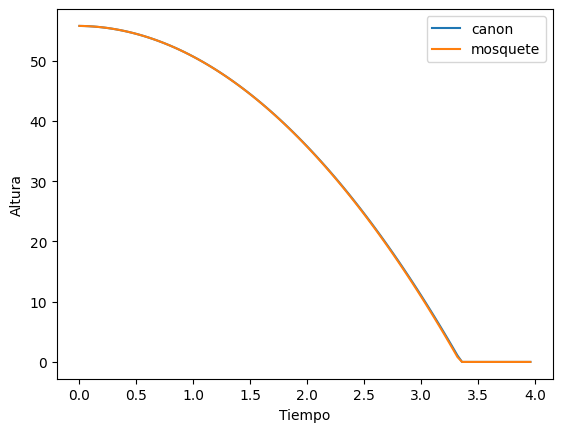

In [3]:

N = 100
h = 4/N

#Datos Iniciales Bola de Canon
x1_c = [55.8]
x2_c = [0]

#Datos Generales
g =9.81
tiempo_c= [0]
#Coeficientes Bola de Canon
m_c = 16
l_c = 0.0058 
c_c = l_c/m_c


#Bola de Canon
for i in range(N):
  tiempo_c.append(i*h)
  
  x2_c.append (x2_c[i] + h*(x2_c[i]*(c_c) -g))  
  l = x1_c[i] + h*x2_c[i]
  if l > 0:
    x1_c.append(l)
  else:
    x1_c.append(0)
  
#Grafico de Bola de Canon
plt.plot(tiempo_c,x1_c, label = "canon")
plt.xlabel('Tiempo')
plt.ylabel('Altura')

#Datos Iniciales Bola de Mosquete
x1_m = [55.8]
x2_m = [0]
#Coeficientes Bola de Mosquete
m_m = 0.0082
l_m = 3.74*(10**(-5))
c_m= l_m/m_m

for i in range(N):
  x2_m.append(x2_m[i] + h*(x2_m[i]*(c_m) -g))  
  l = x1_m[i] + h*x2_m[i]
  if l > 0:
    x1_m.append(l)
  else:
    x1_m.append(0)

#Grafico de Bola de Canon
plt.plot(tiempo_c,x1_m, label = "mosquete")
plt.legend()
plt.show()


Implementacion de Runge-Kutta

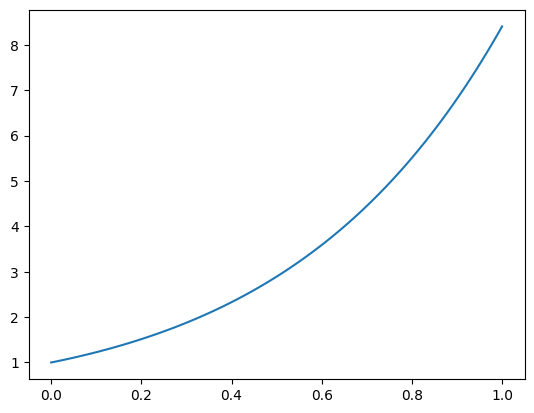

In [4]:
# Definimos la derivada de X
def f(t,x):
  f = 2*x +np.sin(t)
  return f 

def RK(x_0,t_0,t_f,h,f):
  N = int((t_f-t_0)/h)
  x = [x_0]
  t = [t_0]
  for n in range(N):
   t.append(t[-1] + h)
   k1 = f(t[n] + h/2,x[n])
   k2 = f(t[n] + h/2,x[n] + (h/2)*k1)
   k3 = f(t[n] + h/2,x[n] + (h/3)*k1)
   k4 = f(t[n] + h,x[n] + h*k3) 
   xn = x[n] + (h/6)*(k1 + 2*k2 +2*k3 + k4)
   x.append(xn)
  
  return [t,x]

[t,x] = RK(1,0,1,0.01,lambda t,x: f(t,x))
plt.plot(t,x)
plt.show()  
